In [ ]:
import matplotlib.pyplot as lt
import seaborn as sns
import os
import pandas as da
import numpy as nu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as lt

In [ ]:
df = da.read_csv('AllData.csv')
wspeed=nu.sqrt((df["u10"])**2+(df["v10"])**2)
df["wspeed"]=wspeed
df
# Deleting NaN values
#df.replace(-99.90, np.nan, inplace=True)
drp_list=['time','longitude','latitude','Unnamed: 0']

for i in range(len(drp_list)):
  df.drop(drp_list[i], axis=1, inplace=True)
  df.dropna(inplace=True)
  df.reset_index(drop=True, inplace=True)
df=df.rename(columns={'T': 'Temperature'})
#Insert a dummy column because linear regression refuses 1D arrays.
df['ones']=1
df.head()

,YYYY,MM,Temperature,S,O,Q,slhf,ssr,sshf,str,u10,v10,t2m,WL,wspeed,ones
0,2010,1,10.4217,13.1786,11.0026,3563.3496,-11974237.0,11240919.0,-5648075.0,-8154515.0,0.234531,-2.100246,283.48636,-0.0568,2.113300,1
1,2010,2,10.5447,6.2993,10.9593,4320.1324,-12521890.0,13475330.0,-4910544.0,-7808694.5,0.562316,-2.616675,283.71487,-0.0324,2.676413,1
2,2010,3,14.9907,9.4933,10.2436,3501.9661,-8407296.0,17783600.0,-1657170.0,-7135715.5,1.164293,-0.404865,287.66162,-0.0513,1.232677,1
3,2010,4,21.1904,16.4487,7.7550,1424.7409,-6459205.5,22470020.0,-197667.0,-7284165.0,-0.978213,1.734803,292.99527,-0.0092,1.991593,1
4,2010,5,26.4007,11.1174,7.2505,2009.8534,-6227118.5,21909040.0,-311309.0,-5146405.0,-0.770677,2.386455,297.88720,0.1081,2.507810,1


In [ ]:
# #First prepare data. Attempt an 80/20 training/test split.1)
# #T and t2m highly corr, S and Q neg corr,  O highly neg corr with T and t2m
# #Random pulls are old
# yt=df.Temperature
# ys=df.S
# yo=df.O
# x2=df[['t2m', 'ones']]
# xq=df[['Q', 'ones']]

# x2_train, x2_test, yt_train, yt_test = train_test_split(x2,yt,test_size = 0.1, random_state=7)
# xq_train, xq_test, ys_train, ys_test = train_test_split(xq,ys,test_size = 0.1, random_state=7)
# x2o_train, x2o_test, yo_train, yo_test = train_test_split(x2,yo,test_size = 0.1, random_state=7)

In [ ]:
#Linear regression with year pulls
df_train = df[df.YYYY<=2018] # all the years before 2019 as training
df_test = df[df.YYYY>2018]
df_test.reset_index(drop=True, inplace=True)


x2_train=df_train[['ones', 't2m']]
xq_train=df_train[['ones', 'Q']]
x2_test=df_test[['ones', 't2m']]
xq_test=df_test[['ones', 'Q']]
xT2MQ_train=df_train[['ones','t2m','Q']]
xT2MQ_test=df_test[['ones','t2m','Q']]
yt_train=df_train.Temperature
ys_train=df_train.S
yo_train=df_train.O
yt_test=df_test.Temperature
ys_test=df_test.S
yo_test=df_test.O
all_train=df_train[['slhf','ssr','sshf','str','u10','v10','t2m','WL','wspeed']]
all_test=df_test[['slhf','ssr','sshf','str','u10','v10','t2m','WL','wspeed']]
xQWL_train=df_train[['ones','Q','WL']]
xQWL_test=df_test[['ones','Q','WL']]
xslhfQ_train=df_train[['ones','slhf','Q']]
xslhfQ_test=df_test[['ones','slhf','Q']]

In [ ]:
#Let's try T and t2m
model=LinearRegression()
model.fit(x2_train, yt_train)
predictt=model.predict(x2_test)
print(mean_absolute_percentage_error(yt_test, predictt))
model.fit(xq_train, ys_train)
predicts=model.predict(xq_test)
print(mean_absolute_percentage_error(ys_test, predicts))
model.fit(x2_train, yo_train)
predicto=model.predict(x2_test)
print(mean_absolute_percentage_error(yo_test, predicto))
model.fit(xq_train, yo_train)
predictqo=model.predict(xq_test)
print(mean_absolute_percentage_error(yo_test, predictqo))
model.fit(xT2MQ_train, yo_train)
predictT2MQO=model.predict(xT2MQ_test)
print(mean_absolute_percentage_error(yo_test, predictT2MQO))
model.fit(all_train, ys_train)
predictALL=model.predict(all_test)
print(mean_absolute_percentage_error(ys_test, predictALL))
model.fit(xQWL_train, ys_train)
predictxQWL=model.predict(xQWL_test)
print(mean_absolute_percentage_error(ys_test, predictxQWL))
model.fit(xslhfQ_train, ys_train)
predictxslhfQ=model.predict(xslhfQ_test)
print(mean_absolute_percentage_error(ys_test, predictxslhfQ))

0.02133963177631115
0.4171179809557027
0.06623813196603827
0.17067567629726002
0.07071492042780674
0.3533477316414806
0.4172950910546886
0.37958016938067624


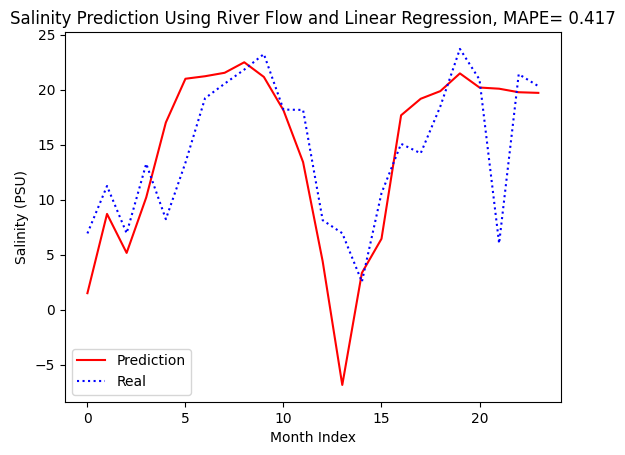

In [ ]:
#Plotting predicted training data against real data
lt.plot(predicts, c='r')
#lt.plot(df_test['S'], c='b', linestyle=':')
lt.plot(ys_test, c='b', linestyle=':')
lt.ylabel('Salinity (PSU)')
lt.xlabel('Month Index')
lt.legend(['Prediction', 'Real'])
lt.title('Salinity Prediction Using River Flow and Linear Regression, MAPE= 0.417')
lt.savefig('RiverFlowvsSalinity.jpg')

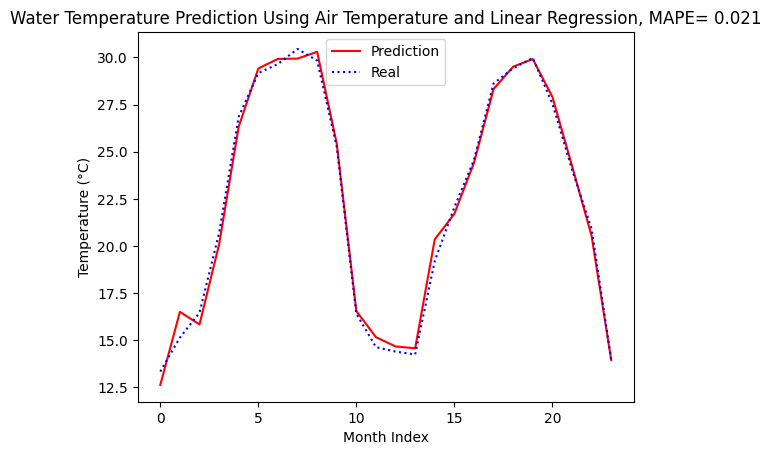

In [ ]:
lt.plot(predictt, c='r')
#lt.plot(df_test['Temperature'], c='b', linestyle=':')
lt.plot(yt_test, c='b', linestyle=':')
lt.ylabel('Temperature (°C)')
lt.xlabel('Month Index')
lt.legend(['Prediction', 'Real'])
lt.title('Water Temperature Prediction Using Air Temperature and Linear Regression, MAPE= 0.021')
lt.savefig('AirTvsWaterT.jpg')

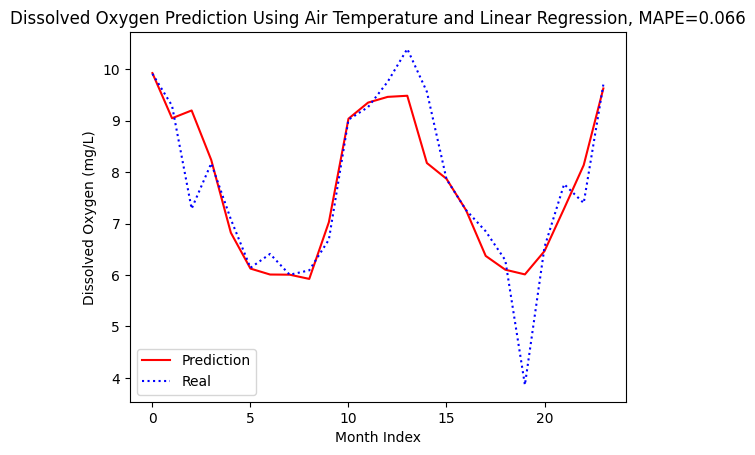

In [ ]:
lt.plot(predicto, c='r')
lt.plot(yo_test, c='b', linestyle=':')
lt.ylabel('Dissolved Oxygen (mg/L)')
lt.xlabel('Month Index')
lt.legend(['Prediction', 'Real'])
lt.title('Dissolved Oxygen Prediction Using Air Temperature and Linear Regression, MAPE=0.066')
lt.savefig('AirTvsDO.jpg')

In [ ]:
lt.plot(predictqo, c='r')
lt.plot(yo_test, c='b', linestyle=':')

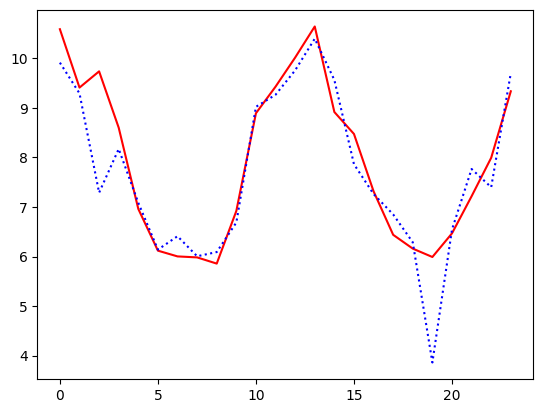

In [ ]:
lt.plot(predictT2MQO, c='r')
lt.plot(yo_test, c='b', linestyle=':')

In [ ]:
#Polynomial attempt
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
xq_train_poly = polynomial_converter.fit_transform(xq_train)
xq_test_poly = polynomial_converter.transform(xq_test)
model = LinearRegression() 
model.fit(xq_train_poly, ys_train)
predictionpolys = model.predict(xq_test_poly)
mean_absolute_percentage_error(ys_test, predictionpolys)
xQWL_train_poly= polynomial_converter.fit_transform(xQWL_train)
xQWL_test_poly= polynomial_converter.fit_transform(xQWL_test)
model = LinearRegression() 
model.fit(xQWL_train_poly, ys_train)
predictionQWL = model.predict(xQWL_test_poly)
print(mean_absolute_percentage_error(ys_test, predictionQWL))
xT2MQ_train_poly= polynomial_converter.fit_transform(xT2MQ_train)
xT2MQ_test_poly= polynomial_converter.fit_transform(xT2MQ_test)
model = LinearRegression() 
model.fit(xT2MQ_train_poly, ys_train)
predictionT2MQ = model.predict(xT2MQ_test_poly)
print(mean_absolute_percentage_error(ys_test, predictionT2MQ))
xslhfQ_train_poly= polynomial_converter.fit_transform(xslhfQ_train)
xslhfQ_test_poly= polynomial_converter.fit_transform(xslhfQ_test)
model = LinearRegression() 
model.fit(xslhfQ_train_poly, ys_train)
predictionxslhfQ = model.predict(xslhfQ_test_poly)
print(mean_absolute_percentage_error(ys_test, predictionxslhfQ))

0.3818456709641196
0.3726731403899716
0.3637173674280745


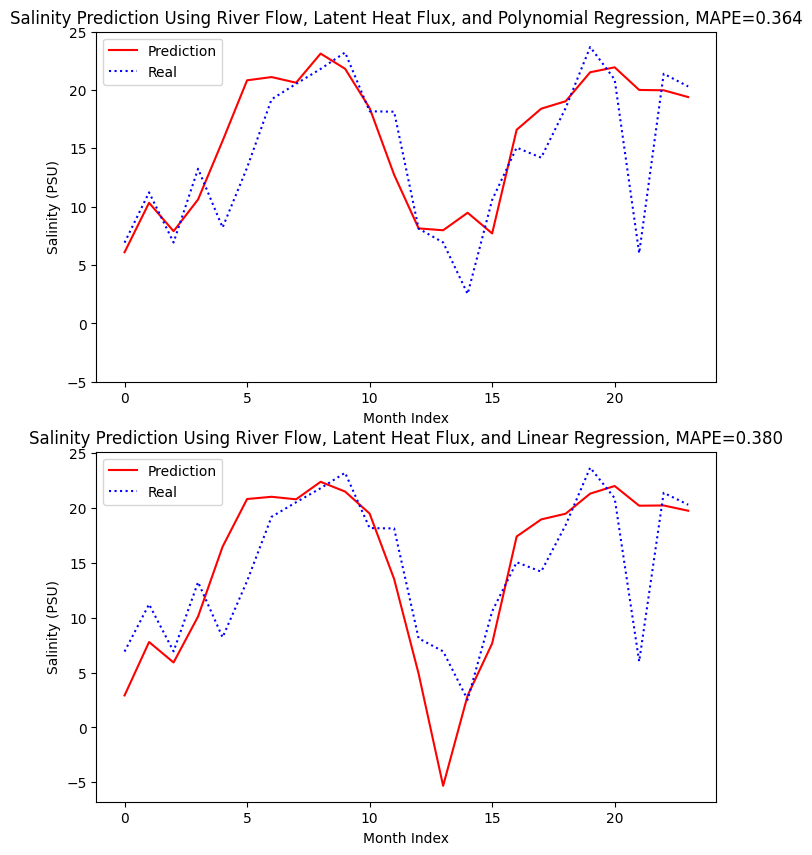

In [ ]:
lt.figure(figsize=[8,10])

lt.subplot(2,1,1)
lt.plot(predictionxslhfQ, c='r')
lt.plot(ys_test, c='b', linestyle=':')
lt.title('Salinity Prediction Using River Flow, Latent Heat Flux, and Polynomial Regression, MAPE=0.364')
lt.ylabel('Salinity (PSU)')
lt.xlabel('Month Index')
lt.setp(lt.gca(),yticks=list(nu.arange(-5,26,5)))
lt.legend(['Prediction', 'Real'])
lt.subplot(2,1,2)
lt.plot(predictxslhfQ, c='r')
lt.plot(ys_test, c='b', linestyle=':')
lt.title('Salinity Prediction Using River Flow, Latent Heat Flux, and Linear Regression, MAPE=0.380')
lt.ylabel('Salinity (PSU)')
lt.xlabel('Month Index')
lt.legend(['Prediction', 'Real'])
lt.savefig('RiverFlowSLHFPolyvsSalinity.jpg')

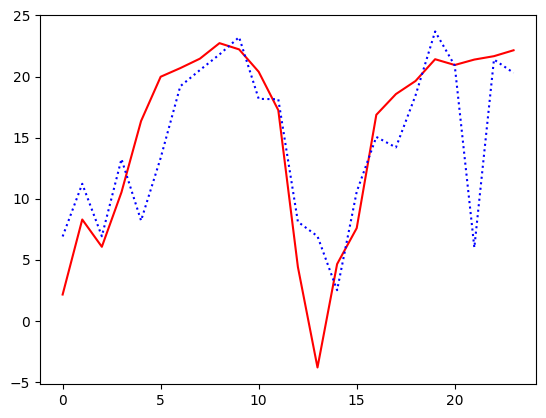

In [ ]:
#Random testing grounds
x=da.array([[1],[2]])
x.reshape(-1,1)

<PandasArray>
[
[[1]],
[[2]]
]
Shape: (2, 1), dtype: object